In [1]:
# Imports
import os
import numpy as np
import pandas as pd

from src.my_settings import settings
sett = settings()

from src.utils import parse_prt_file

In [25]:
# Folder with the npz files
npy_path = os.path.join(sett["bids_path"], 'derivatives', 'tbv-script-outs')

# Get all the npz files
npy_files = [f for f in os.listdir(npy_path) if f.endswith('.npz') and f.startswith('sub-')]

# Sort the files
npy_files.sort()

print(f'Found {len(npy_files)} npz files.')

Found 88 npz files.


In [15]:
# Read PRT file
prtPath = os.path.join(sett["git_path"],'data','prt','MusicNF_Main_v0.3_PostDiscard.prt')
conditions, cond_names = parse_prt_file(prtPath)

# delete first row of condition['Rest']
conditions['Rest'] = np.delete(conditions['Rest'], 0, 0)

indexes_rest = [np.arange(i[0], i[1]+1) for i in conditions['Rest']]
indexes_mi = [np.arange(i[0], i[1]+1) for i in conditions['MotorImagery']]

In [23]:
a = np.load(os.path.join(npy_path, npy_files[78]))
a.files

['ROImeans',
 'PearsonCorr',
 'PearsonCorrDiscrete',
 'SignalVar',
 'SignalVarDiscrete',
 'PearsonCorrSham',
 'PearsonCorrDiscreteSham']

In [26]:
# The only ones with sham data
npy_files = npy_files[78:]

In [44]:


# Initalize the data frame
df = pd.DataFrame(columns=['sub', 'feedback', 'correlation_tc', 'correlation_mean', 'correlation_mean_first_half', 'correlation_mean_second_half'])


# Loop through all the files
for npy_file in npy_files:

    # Get the subject number
    sub = npy_file.split('_')[0]

    # Get the feedback type
    feedback = npy_file.split('_')[2].lower()
    
    # Load the file
    data = np.load(os.path.join(npy_path, npy_file))
    
    if feedback == 'active':
        pc = data['PearsonCorr']
        rest_str = 'rest_active'
    elif feedback == 'sham':
        pc = data['PearsonCorrSham']
        rest_str = 'rest_sham'

    # delete all numbers above 1 and below -1 (invalid values due to window)
    pc[pc > 1] = np.nan
    pc[pc < -1] = np.nan

    # fisher transform
    #pc = np.arctanh(pc)

    # Get the correlations values for the Motor Imagery per trial and add to the data frame
    for ii in range(len(indexes_mi)):
        pc_mi = pc[indexes_mi[ii]]
        
        df = pd.concat(
            [df, pd.DataFrame(
                [[sub, feedback, pc_mi, np.nanmean(pc_mi), np.nanmean(pc_mi[3:10]), np.nanmean(pc_mi[10:])]],
                  columns=df.columns)])
    
    # Get the correlations values for the Rest per trial and add to the data frame
    for ii in range(len(indexes_rest)):
        pc_rest = pc[indexes_rest[ii]]
        
        df = pd.concat(
            [df, pd.DataFrame(
                [[sub, rest_str, pc_rest, np.nanmean(pc_rest), np.nanmean(pc_rest[3:10]), np.nanmean(pc_rest[10:])]],
                  columns=df.columns)])



/var/folders/nd/bgqkn02j7sl982jdtqhts9z00000gn/T/ipykernel_5543/960654428.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


In [45]:
df

,sub,feedback,correlation_tc,correlation_mean,correlation_mean_first_half,correlation_mean_second_half
0,sub-20,sham,"[[0.32328252954544734], [0.7292075839988676], ...",0.579092,0.543944,0.586040
0,sub-20,sham,"[[0.11137054748326991], [0.8229443770724607], ...",0.486049,0.537109,0.457570
0,sub-20,sham,"[[0.3407589263610369], [0.779862019171657], [0...",0.413335,0.409968,0.413332
0,sub-20,sham,"[[0.46278410069536124], [0.6018255765057029], ...",0.427972,0.383203,0.392355
0,sub-20,sham,"[[0.9935344734474739], [0.055818128108246934],...",0.529771,0.427517,0.568993
0,sub-20,sham,"[[0.24789337133601175], [0.7124439714710105], ...",0.505546,0.633440,0.399469
0,sub-20,rest_sham,"[[0.3242765402686466], [0.10006531058044865], ...",0.470246,0.452406,0.492112
0,sub-20,rest_sham,"[[0.17448890164909037], [0.974147355036497], [...",0.494204,0.595336,0.402529
0,sub-20,rest_sham,"[[0.21701815741060526], [0.6754585724984197], ...",0.529722,0.441062,0.588669
0,sub-20,rest_sham,"[[0.6233616919781613], [0.2973868755316328], [...",0.536679,0.520725,0.612983


np.float64(3.304498976672318e-14)

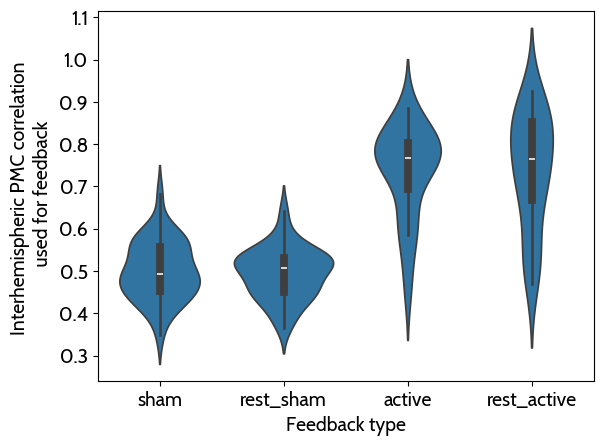

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='feedback', y='correlation_mean', data=df)
plt.ylabel('Interhemispheric PMC correlation \n used for feedback')
plt.xlabel('Feedback type')

# test for statistical difference between the means

fb1 = df[df['feedback'] == 'active']['correlation_mean']
fb2 = df[df['feedback'] == 'sham']['correlation_mean']

from scipy.stats import ttest_ind

ttest_ind(fb1, fb2, nan_policy='omit')[1] * 2